In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
data = pd.read_csv("./Data/data+column_relation.csv")

# 'fake_follower',,'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','12:00 AM','1:00 AM','2:00 AM','3:00 AM','4:00 AM','5:00 AM','6:00 AM','7:00 AM','8:00 AM','9:00 AM','10:00 AM','11:00 AM','12:00 PM','1:00 PM','2:00 PM','3:00 PM','4:00 PM','5:00 PM','6:00 PM','7:00 PM','8:00 PM','9:00 PM','10:00 PM','11:00 PM'
# ,'avg_tweets_by_hour_of_day','avg_tweets_by_day_of_week'
x = data.iloc[:,:-3]

y = data.account_type.values.tolist()


SelectKBest

In [2]:
# Select features according to the k highest scores.
bestfeatures = SelectKBest(score_func=f_classif,k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

# result :avg_tweets_by_day_of_week,avg_tweets_by_hour_of_day,verified ,location,date_joined, likes

                        Specs        Score
16  avg_tweets_by_day_of_week  4706.430184
15  avg_tweets_by_hour_of_day  4706.384585
0                    verified  3888.302600
13                        url  2399.864550
2                    location  1744.201520
3                 date_joined  1433.929373
7                  favourites   972.669256
11                    retweet   911.753823
14              userNameScore   681.271004
19             engagment_rate   502.014379
6                   followers   253.901910
10           tweets_this_week   241.197627
9              tweet_language   166.329859
12            retweeted_count   157.960567
4            most_recent_post    38.886827
18         followers/lastpost    29.517017
8                       lists    27.887008
17            following/years     5.796854
1                    statuses     3.854457
5                   following     0.118699


Tree-based Feature Selection
RandomForestClassifier

[0.01111    0.06661287 0.00640663 0.03338501 0.05568041 0.06618099
 0.10869195 0.0932815  0.04186883 0.01996201 0.01268464 0.06225829
 0.05986485 0.00528818 0.02964871 0.08564982 0.09343227 0.04997236
 0.04794625 0.05007444]


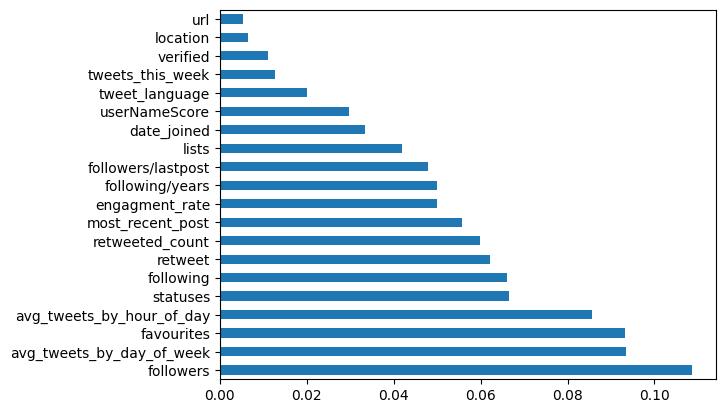

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.00667237 0.07966386 0.00381226 0.02396493 0.02374315 0.07002229
 0.3007442  0.07632999 0.02055312 0.01883946 0.00765149 0.06388132
 0.05672871 0.00347476 0.02914463 0.04711492 0.02636804 0.06016054
 0.04514856 0.03598143]


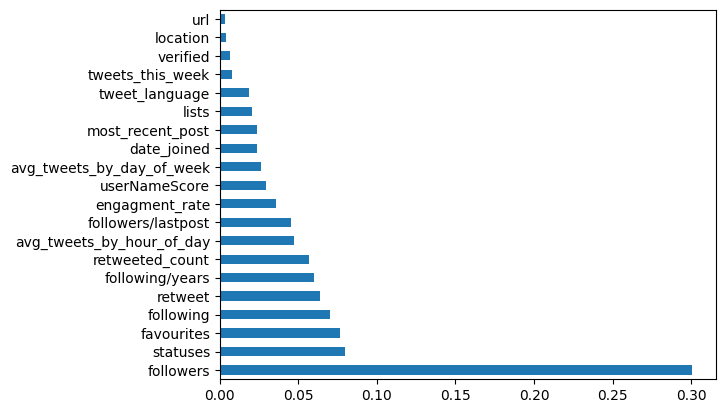

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = DecisionTreeClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

correlations

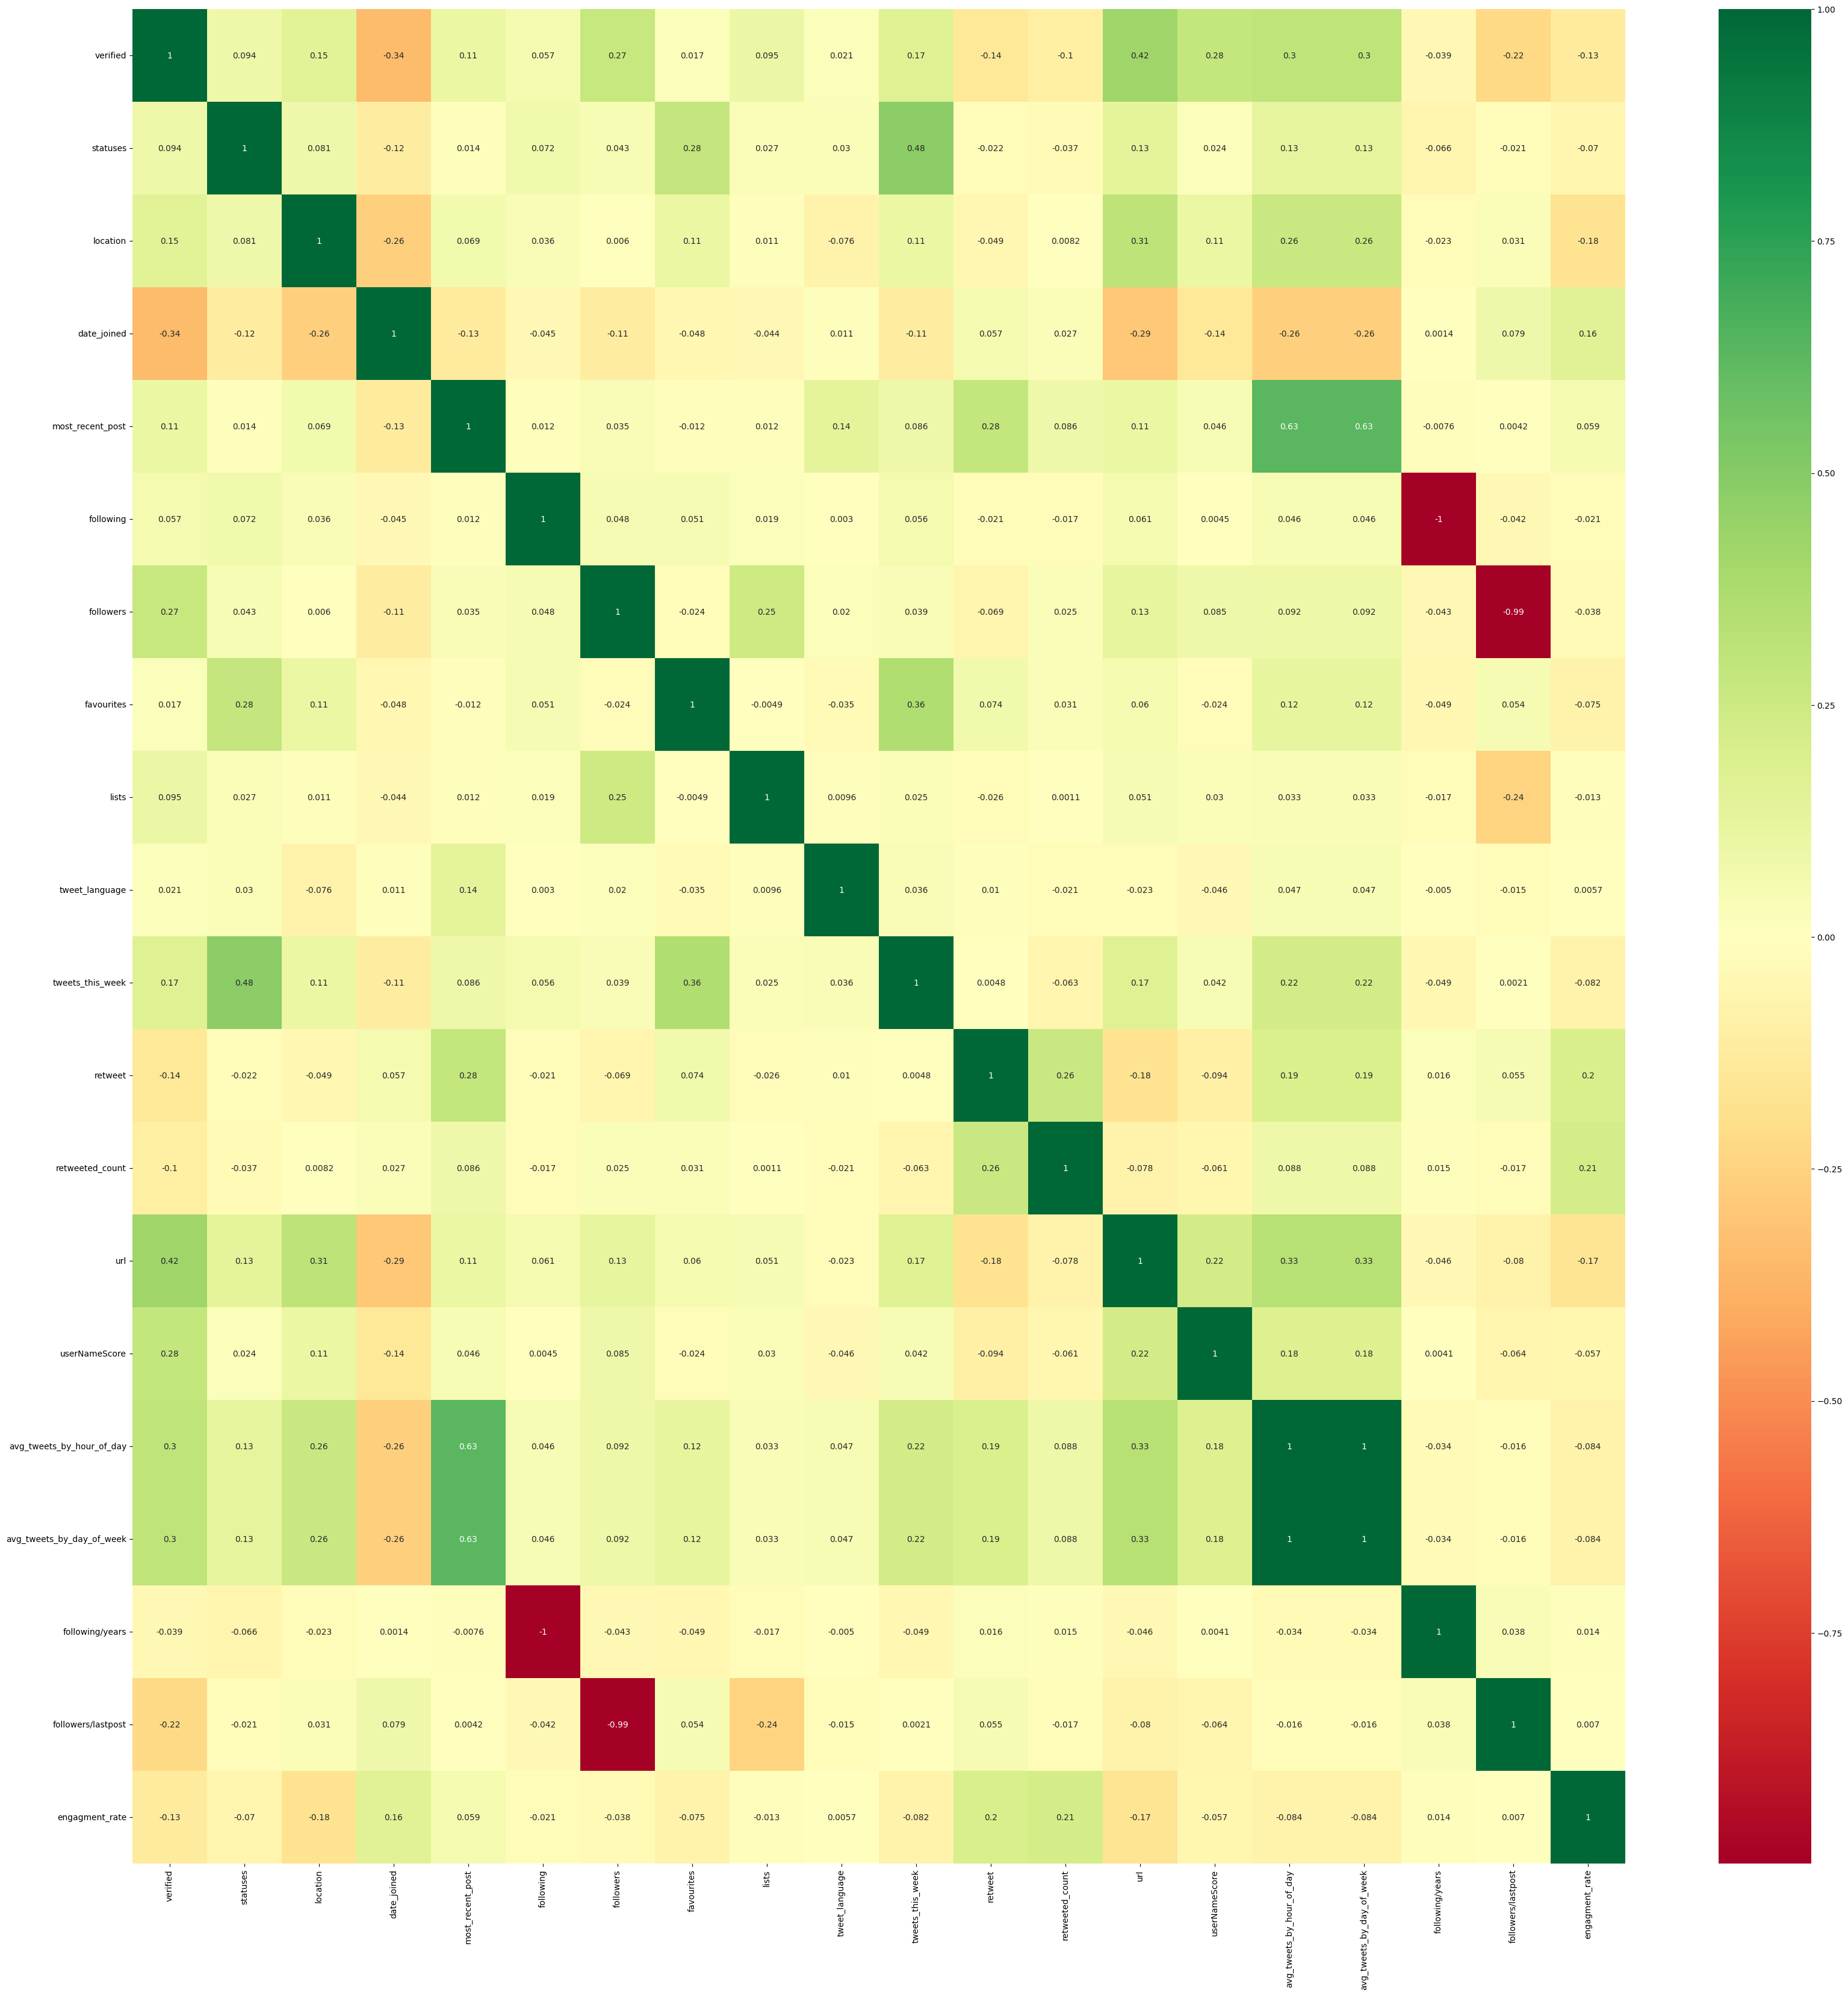

In [5]:
import pandas as pd
import numpy as npmutual_info_classif
import seaborn as sns

#get correlations of each features in dataset
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

there is correlation between :
followers/lastpost - followers :negative 
following - following/years:negative
tweet by houre -tweet by day : positive 


Correlation-based Feature Selection (CFS)

In [12]:
bestfeatures = SelectKBest(score_func=mutual_info_classif,k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                        Specs     Score
18         followers/lastpost  0.196250
6                   followers  0.167331
16  avg_tweets_by_day_of_week  0.162311
15  avg_tweets_by_hour_of_day  0.160535
19             engagment_rate  0.158169
4            most_recent_post  0.142447
17            following/years  0.126815
5                   following  0.120050
7                  favourites  0.109279
1                    statuses  0.100581
